#**Working with "House Price" Dataset**

In [54]:
import pandas as pd
import numpy as np

#Load & Show the dataset

In [3]:
house_price = pd.read_csv("/content/train.csv")

In [4]:
house_price.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


#Understanding the dataset

In [20]:
house_price.shape

(1460, 81)

In [5]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Variable Categorization

In [92]:
numerical_features = []
categorical_features = []

for column in house_price.columns:
    if house_price[column].dtype == "object":
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepla

In [21]:
house_price.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1004,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,181000
196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
303,304,20,RL,70.0,9800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Abnorml,149900
306,307,60,RL,116.0,13474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,225000
748,749,20,RL,59.0,10593,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,260400


#Is there any missing value?

In [22]:
house_price.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


#Is there any duplicate value?

In [23]:
house_price.duplicated().sum()

np.int64(0)

#Understanding the dataset (Mathematically)

In [24]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Understanding the correlation for each column

In [25]:
house_price.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


#Understanding the correlation for Target column

In [26]:
house_price.corr(numeric_only=True)["SalePrice"]

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420


#Calculate (Mean, Median, Skew, Kurtosis) for "SalePrice"

In [52]:
sp_mean = house_price["SalePrice"].mean()
sp_median = house_price["SalePrice"].median()
sp_skew = house_price["SalePrice"].skew()
sp_kurtosis = house_price["SalePrice"].kurtosis()

print(f"Mean: {sp_mean:,.2f}")
print(f"Median: {sp_median:,.2f}")
print(f"Skew: {sp_skew:,.2f}")
print(f"Kurtosis: {sp_kurtosis:,.2f}")

Mean: 180,921.20
Median: 163,000.00
Skew: 1.88
Kurtosis: 6.54


#Histogram

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

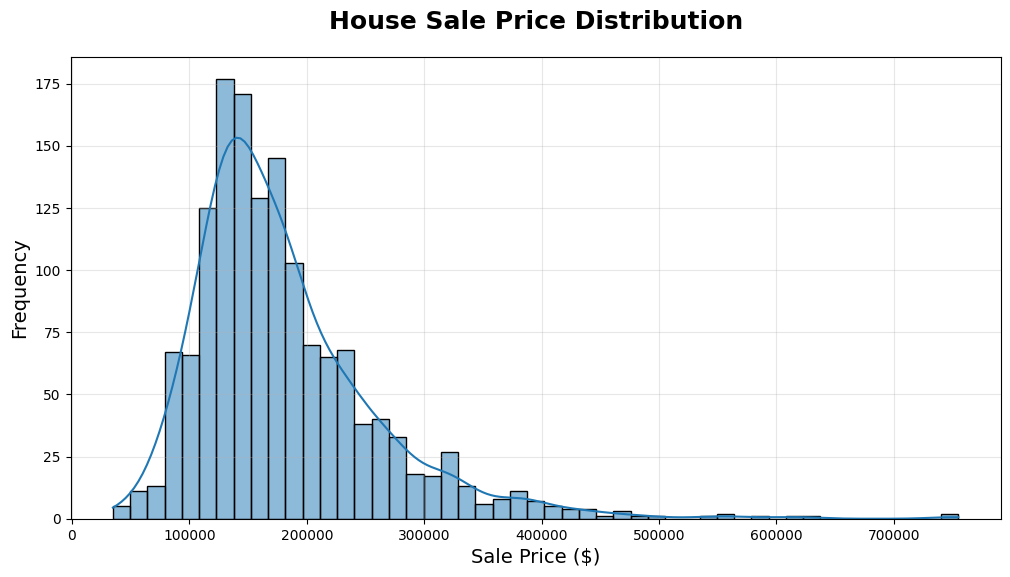

In [93]:
# Figure
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(house_price["SalePrice"], kde=True, ax=ax)

# Formatting
ax.set_title("House Sale Price Distribution", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel("Sale Price ($)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.grid(True, alpha=0.3)


#Q-Q plot

In [66]:
import scipy.stats as stats

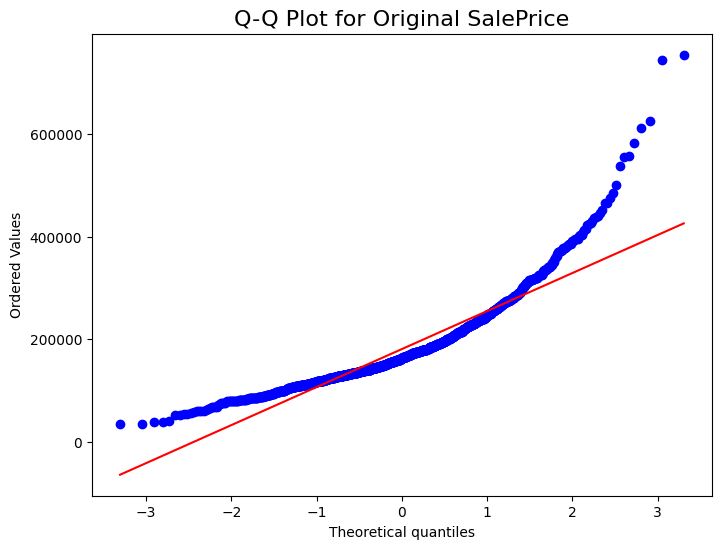

In [94]:
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(house_price["SalePrice"], dist="norm", plot=ax)
ax.set_title("Q-Q Plot for Original SalePrice", fontsize=16)
plt.show()

#Convert normal distribution

<Axes: xlabel='SalePrice', ylabel='Count'>

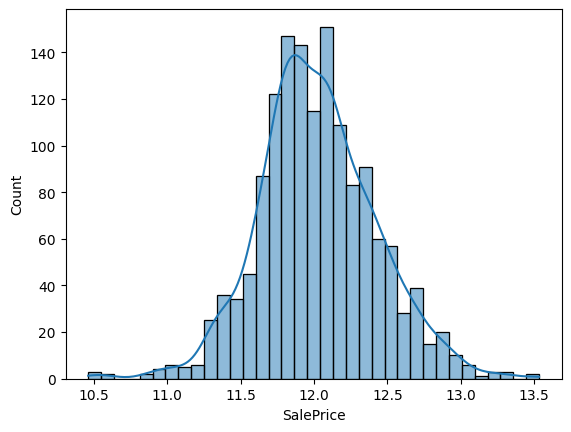

In [61]:
sns.histplot(np.log(house_price["SalePrice"]), kde=True)

#Q-Q Plot for Log-Transformed SalePrice

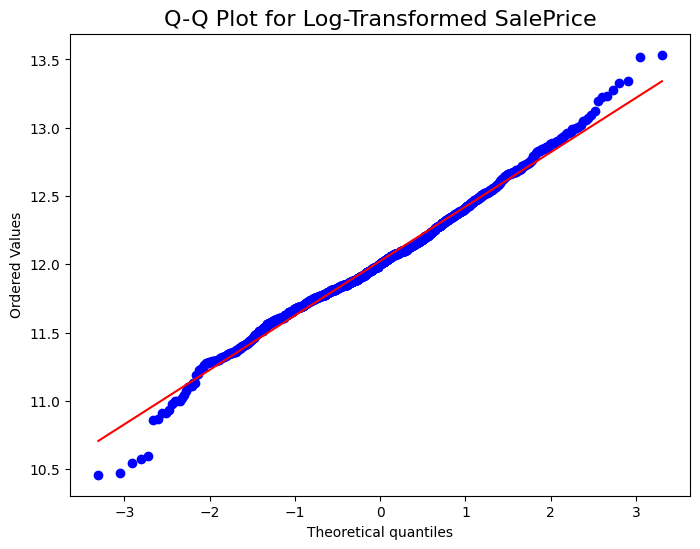

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(np.log(house_price["SalePrice"]), dist="norm", plot=ax)
ax.set_title("Q-Q Plot for Log-Transformed SalePrice", fontsize=16)
plt.show()

#Outlier Detection

In [70]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
sorted_sp = sorted(house_price["SalePrice"])
print(sorted_sp)

[34900, 35311, 37900, 39300, 40000, 52000, 52500, 55000, 55000, 55993, 58500, 60000, 60000, 60000, 61000, 62383, 64500, 66500, 67000, 67000, 68400, 68500, 72500, 73000, 75000, 75500, 76000, 76500, 78000, 79000, 79000, 79000, 79500, 79900, 79900, 80000, 80000, 80000, 80000, 80500, 81000, 81000, 81000, 82000, 82000, 82000, 82500, 82500, 82500, 83000, 83000, 83500, 84000, 84500, 84500, 84500, 84900, 85000, 85000, 85000, 85000, 85400, 85500, 86000, 86000, 86000, 87000, 87000, 87000, 87000, 87500, 88000, 88000, 88000, 88000, 89000, 89471, 89500, 89500, 90000, 90000, 90000, 90350, 91000, 91000, 91000, 91300, 91500, 91500, 92000, 92900, 93000, 93000, 93000, 93500, 93500, 94000, 94500, 94750, 95000, 95000, 96500, 96500, 97000, 97000, 97000, 97500, 98000, 98000, 98000, 98300, 98600, 99500, 99900, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 101000, 101800, 102000, 102000, 102000, 102776, 103000, 103200, 103600, 104000, 104900, 104900, 105000, 105000, 105000, 105000, 1

### Find Q1 and Q3

In [75]:
Q1 = np.percentile(sorted_sp, 25)
Q3 = np.percentile(sorted_sp, 75)

print(f"Q1 = {Q1:,.2f}")
print(f"Q3 = {Q3:,.2f}")

Q1 = 129,975.00
Q3 = 214,000.00


### Find IQR

In [77]:
IQR = Q3 - Q1
print(f"IQR = {IQR:,.2f}")

IQR = 84,025.00


### Lower Fence & Upper Fence

In [78]:
LF = Q1 - (1.5 * IQR)
UF = Q3 + (1.5 * IQR)

print(f"Lower Fence = {LF:,.2f}")
print(f"Upper Fence = {UF:,.2f}")

Lower Fence = 3,937.50
Upper Fence = 340,037.50


### Filter the non outliers element from data

In [79]:
non_outlier_sp = []

for i in house_price["SalePrice"]:
  if i >= LF and i <= UF:
    non_outlier_sp.append(i)
  else:
    pass

print(non_outlier_sp)

[208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000, 129500, 144000, 279500, 157000, 132000, 149000, 90000, 159000, 139000, 325300, 139400, 230000, 129900, 154000, 256300, 134800, 306000, 207500, 68500, 40000, 149350, 179900, 165500, 277500, 309000, 145000, 153000, 109000, 82000, 160000, 170000, 144000, 130250, 141000, 319900, 239686, 249700, 113000, 127000, 177000, 114500, 110000, 130000, 180500, 172500, 196500, 124900, 158000, 101000, 202500, 140000, 219500, 317000, 180000, 226000, 80000, 225000, 244000, 129500, 185000, 144900, 107400, 91000, 135750, 127000, 136500, 110000, 193500, 153500, 245000, 126500, 168500, 260000, 174000, 164500, 85000, 123600, 109900, 98600, 163500, 133900, 204750, 185000, 214000, 94750, 83000, 128950, 205000, 178000, 118964, 198900, 169500, 250000, 100000, 115000, 115000, 190000, 136900, 180000, 217000, 259500, 176000, 139000, 155000, 320000, 163990, 180000, 100000, 136000, 153900, 181000, 84500, 128000, 87000, 155000, 150000, 226

#Boxplot of Original SalePrice

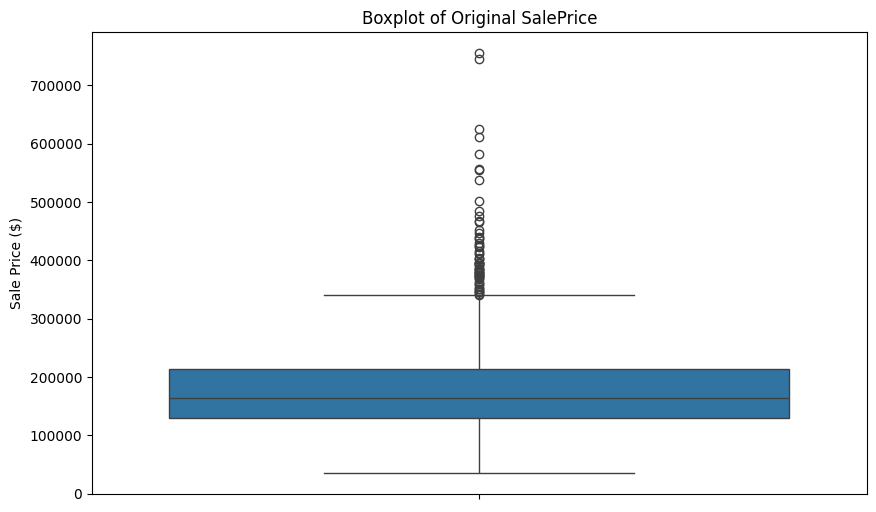

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=house_price["SalePrice"])
plt.title("Boxplot of Original SalePrice")
plt.ylabel("Sale Price ($)")
plt.show()

#Boxplot of SalePrice After Outlier Removal

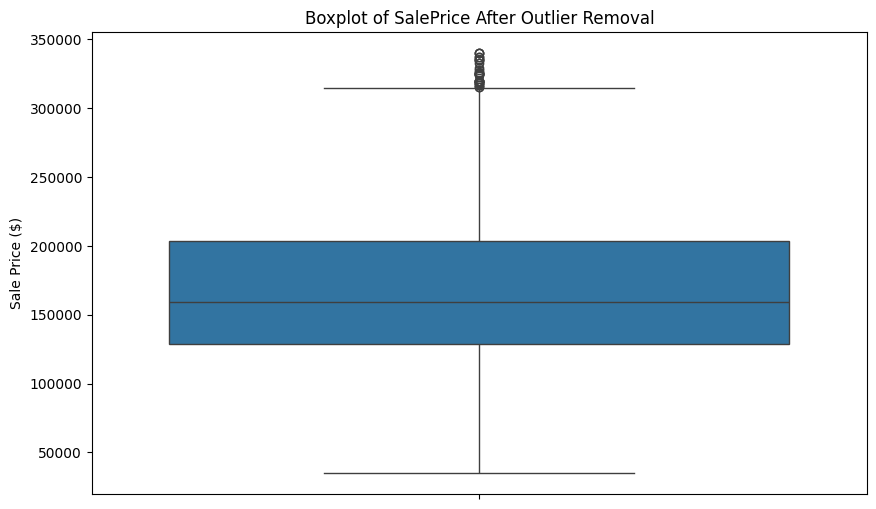

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=non_outlier_sp)
plt.title("Boxplot of SalePrice After Outlier Removal")
plt.ylabel("Sale Price ($)")
plt.show()

#Correlation Matrix: Generate a heatmap of the correlation matrix.


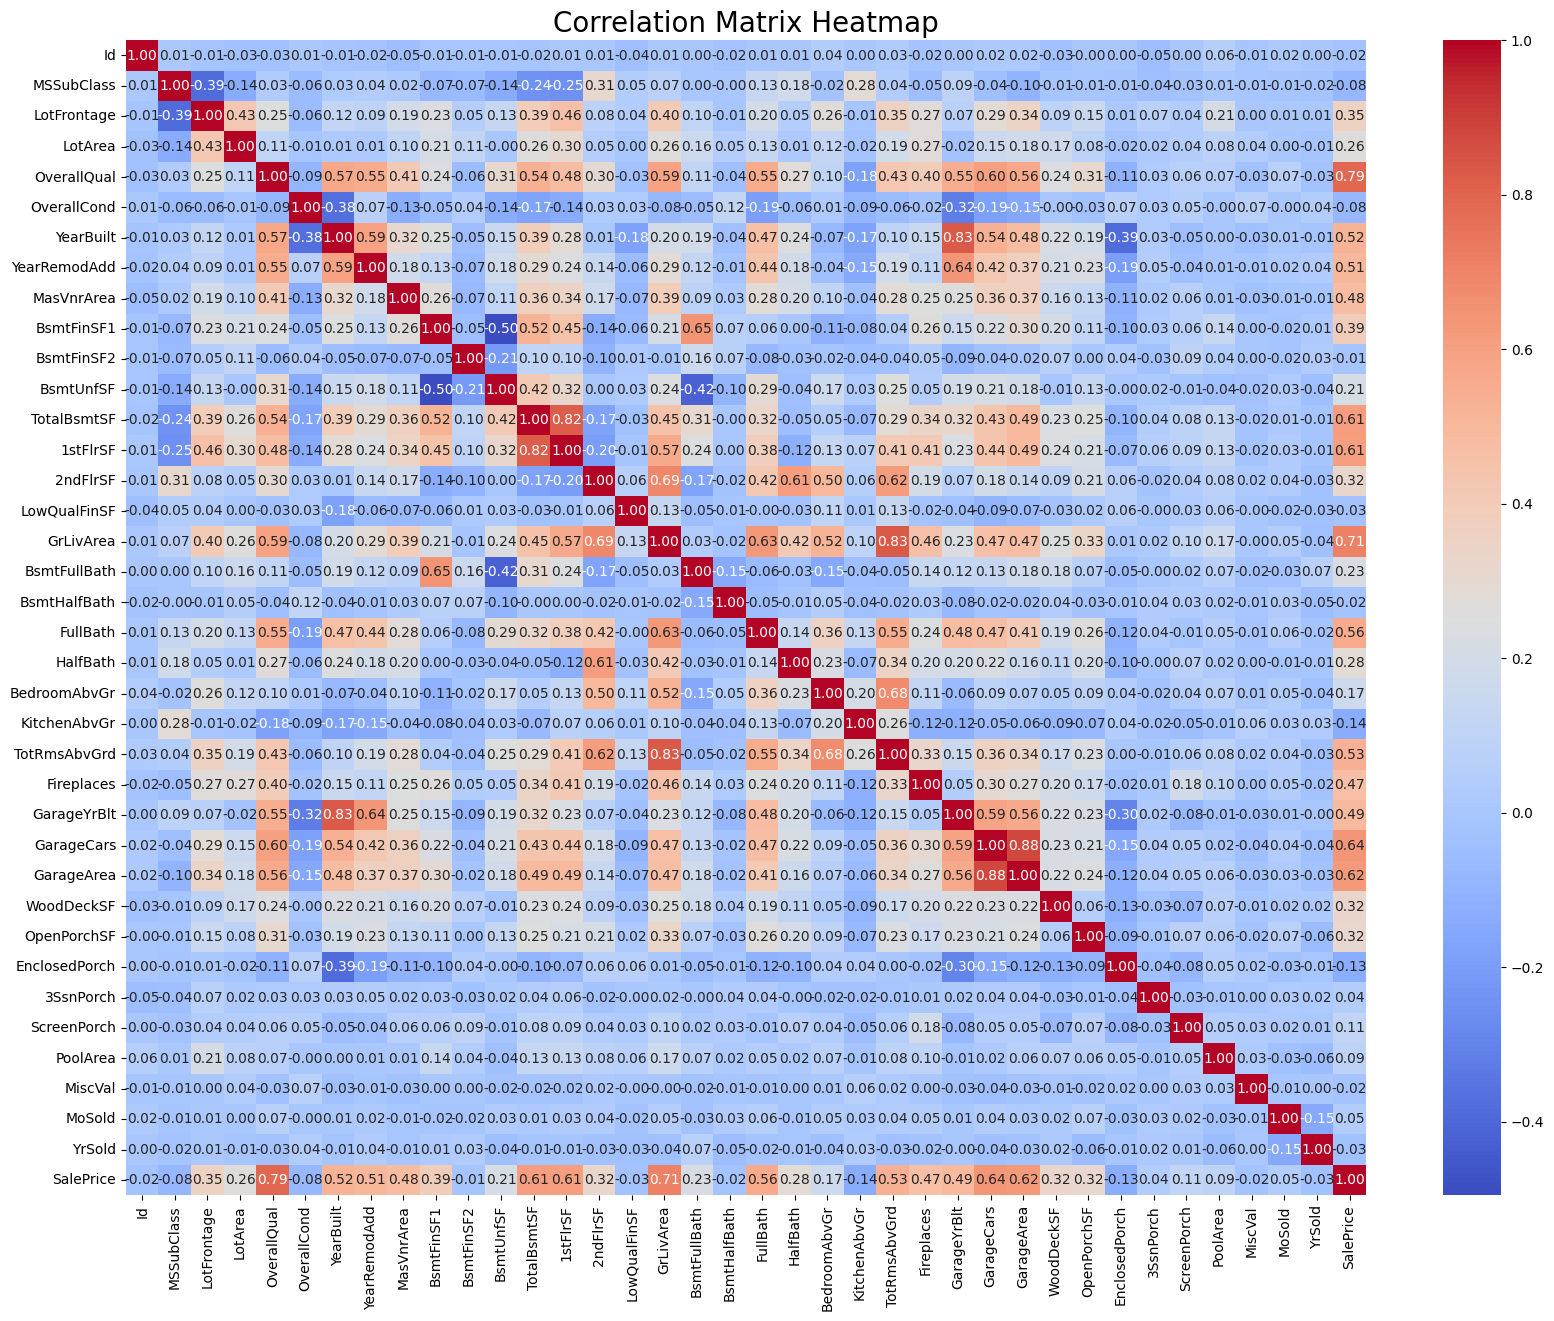

In [98]:
correlation_matrix = house_price.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=20)
plt.show()

#Identify the top 10 features most strongly correlated with SalePrice.

In [88]:
correlation_with_saleprice = correlation_matrix["SalePrice"].sort_values(ascending=False)
top_10_correlated_features = correlation_with_saleprice[1:11]

print(f"Top 10 features most strongly correlated with SalePrice: \n{top_10_correlated_features}")

Top 10 features most strongly correlated with SalePrice: 
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


### Pairplot

<Figure size 1500x1000 with 0 Axes>

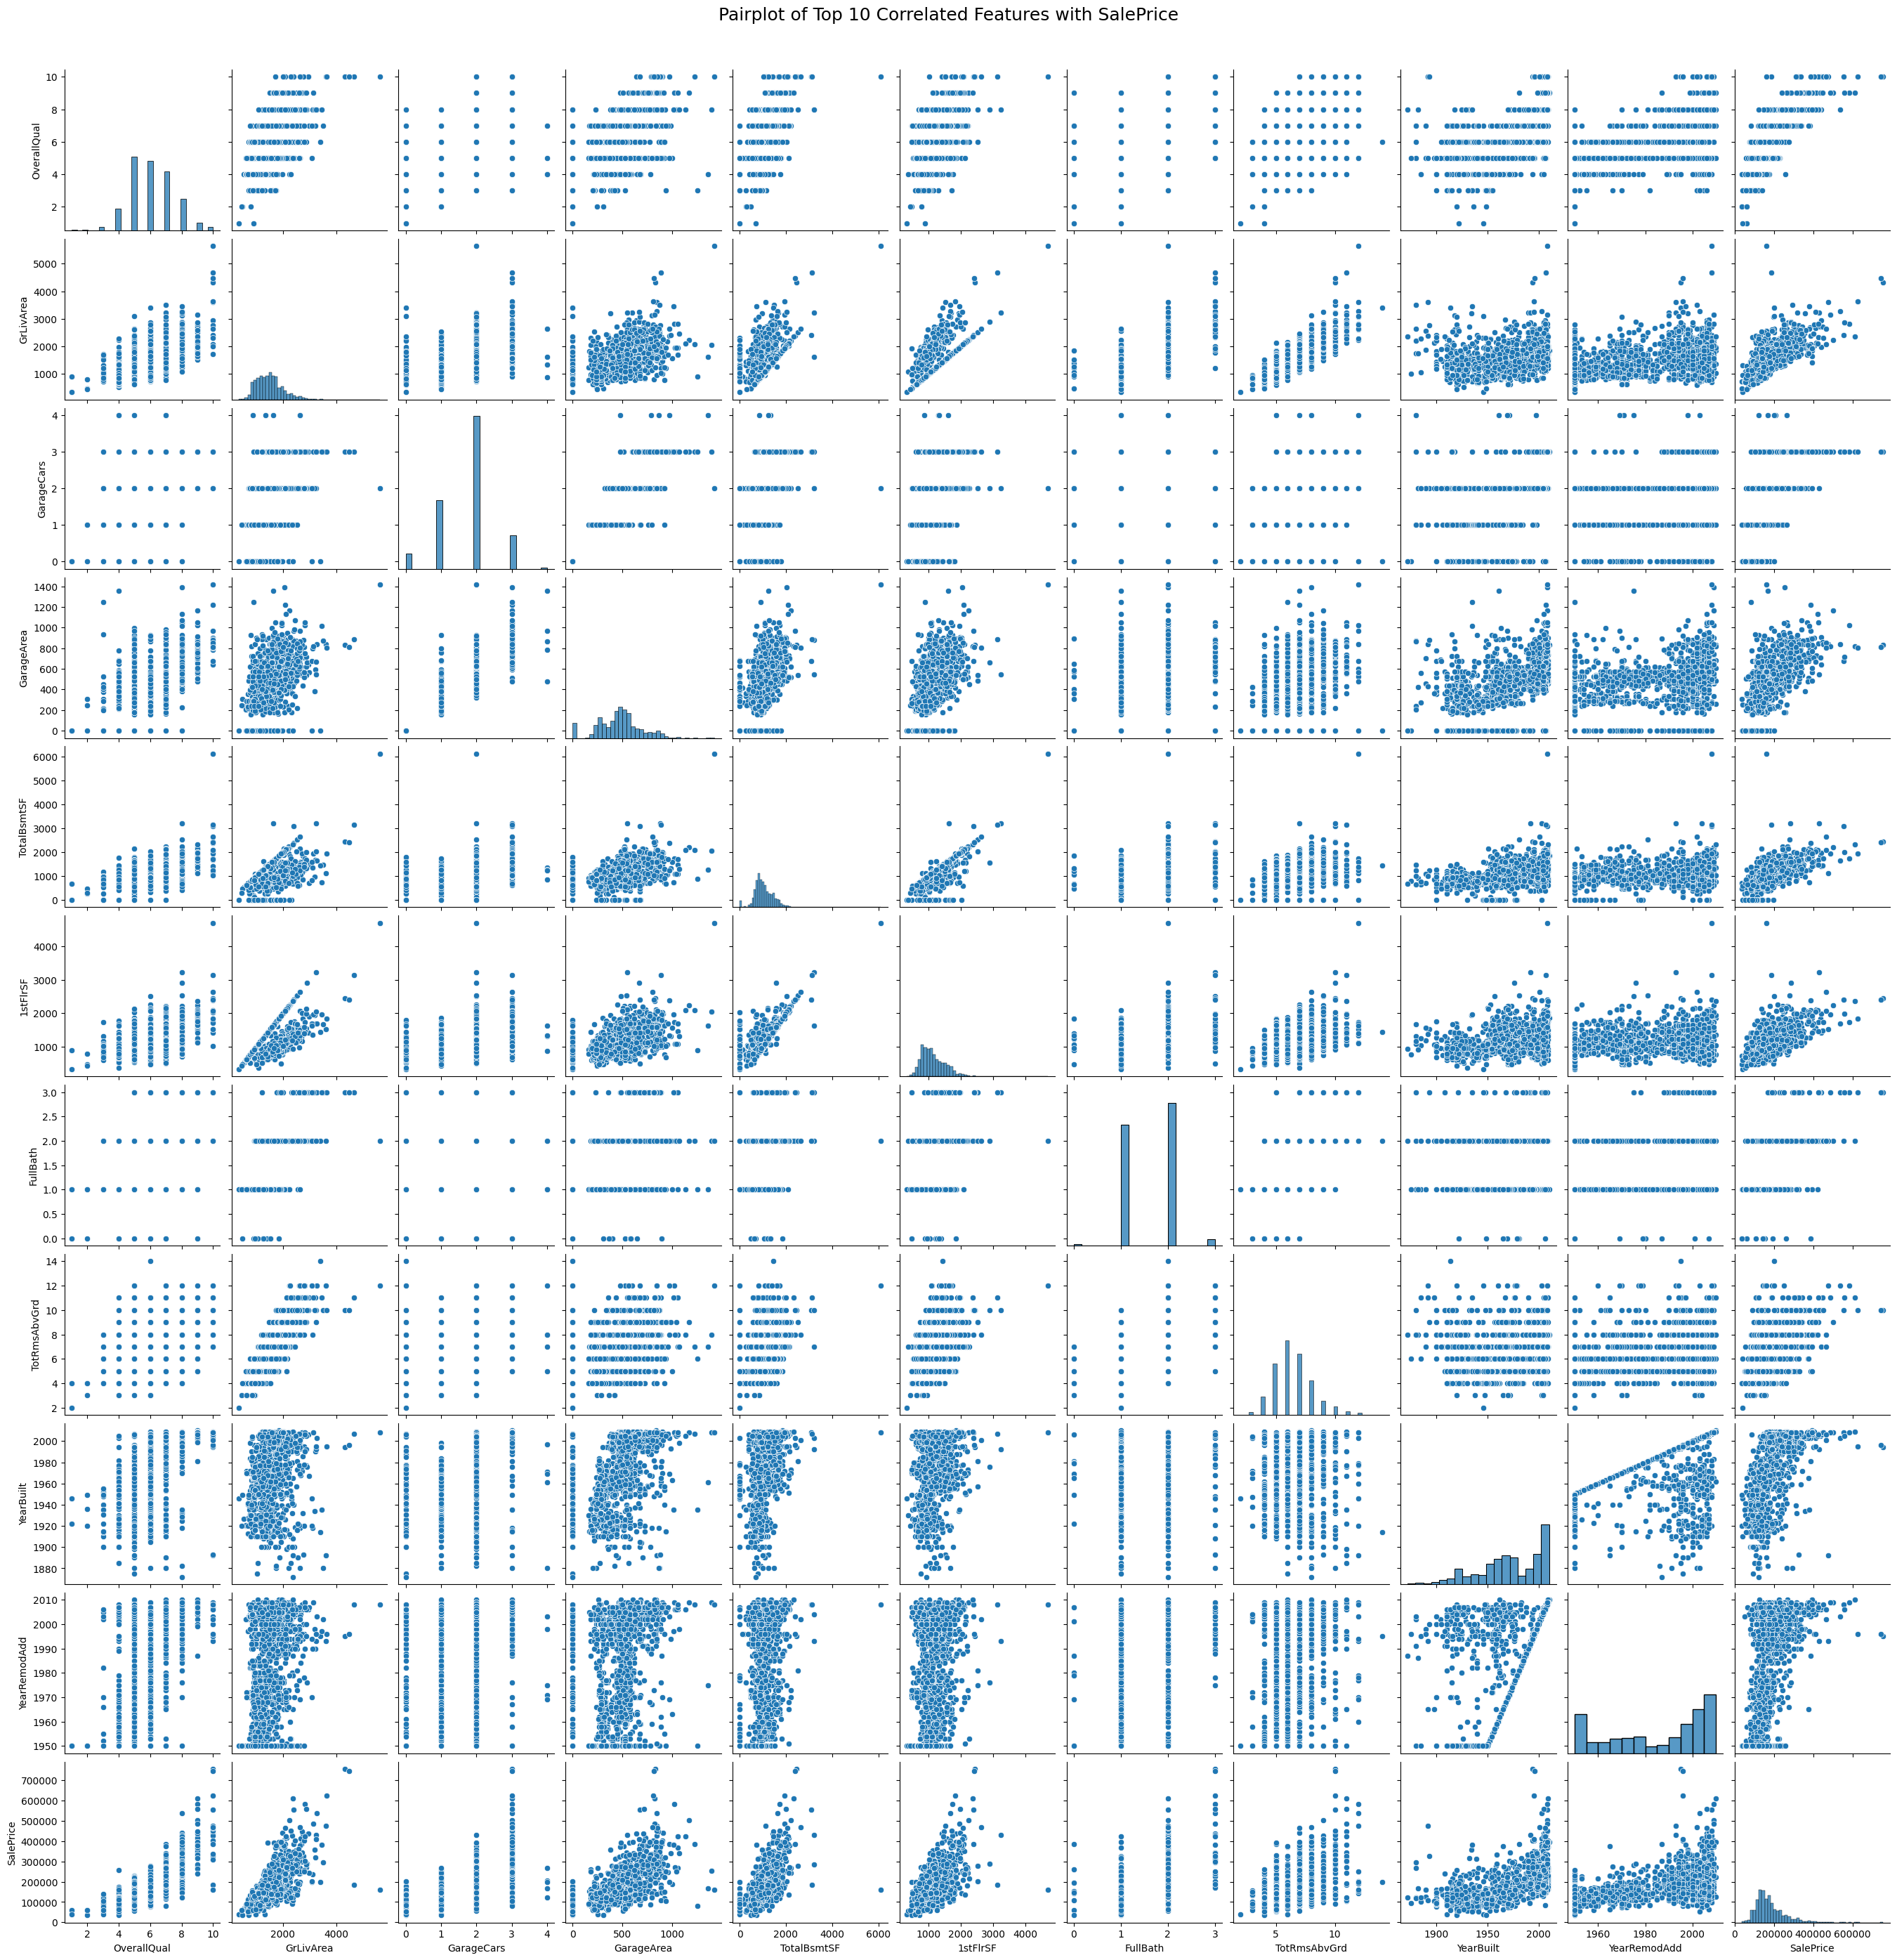

In [101]:
features_for_pairplot = top_10_correlated_features.index.tolist() + ['SalePrice']

plt.figure(figsize=(15, 10))
sns.pairplot(house_price[features_for_pairplot])
plt.suptitle('Pairplot of Top 10 Correlated Features with SalePrice', y=1.02, fontsize=18)
plt.show()

#Relationship between OverallQual (1–10 scale) and SalePrice.

/tmp/ipython-input-3908824219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="OverallQual", y="SalePrice", data=house_price, palette="viridis")


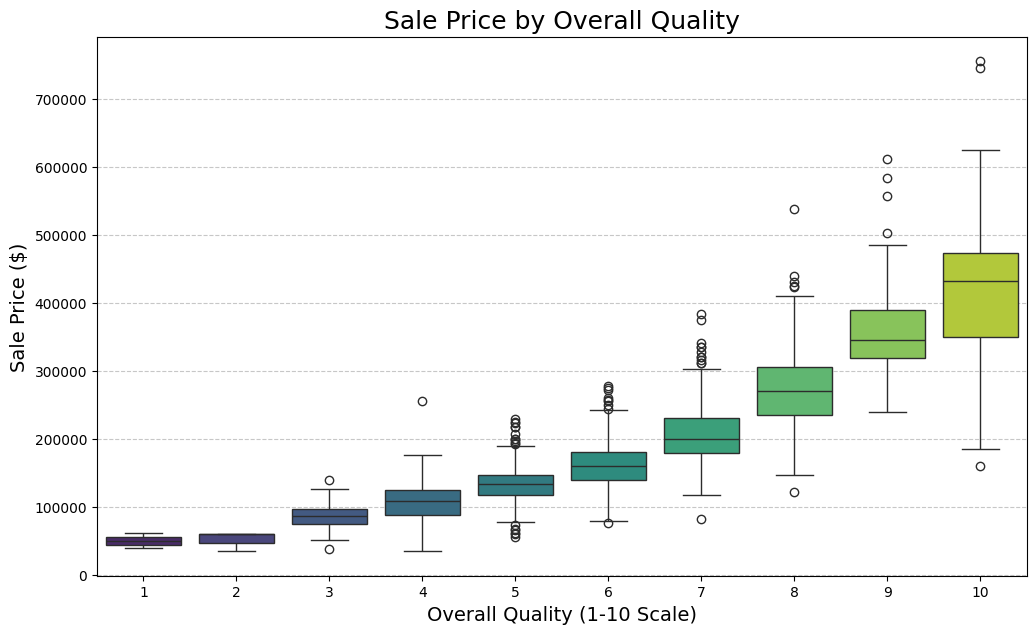

In [99]:
#Figure Size
plt.figure(figsize=(12, 7))

sns.boxplot(x="OverallQual", y="SalePrice", data=house_price, palette="viridis")

#Formatting
plt.title("Sale Price by Overall Quality", fontsize=18)
plt.xlabel("Overall Quality (1-10 Scale)", fontsize=14)
plt.ylabel("Sale Price ($)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#Neighborhood Analysis

/tmp/ipython-input-3963623582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_neighborhood.index, y=avg_price_per_neighborhood.values, palette="coolwarm")


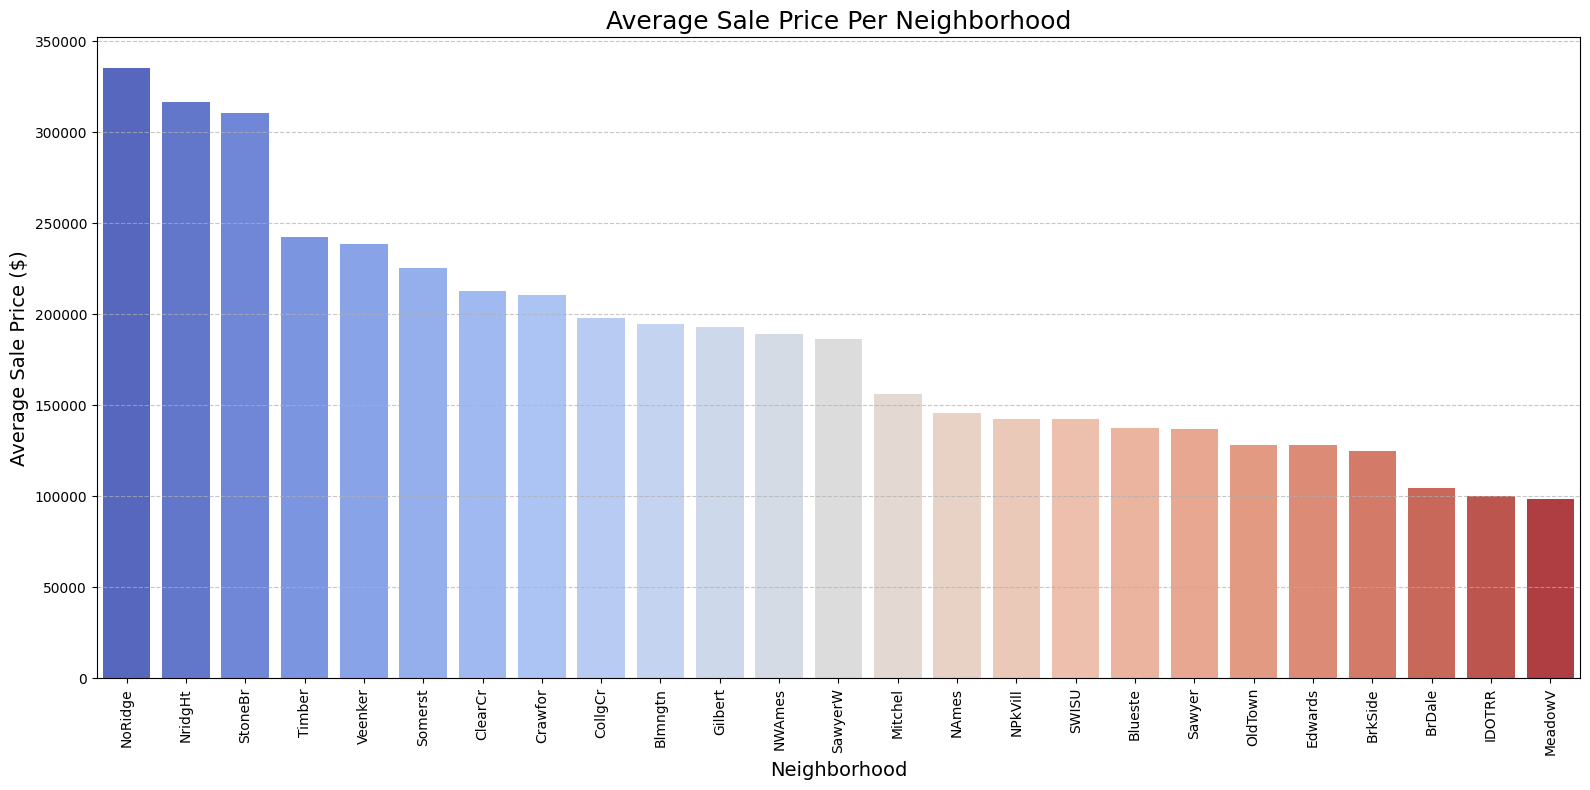

The 'Beverly Hills' of this dataset (neighborhood with the highest average sale price) is: NoRidge


In [91]:
avg_price_per_neighborhood = house_price.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=avg_price_per_neighborhood.index, y=avg_price_per_neighborhood.values, palette="coolwarm")

plt.title("Average Sale Price Per Neighborhood", fontsize=18)
plt.xlabel("Neighborhood", fontsize=14)
plt.ylabel("Average Sale Price ($)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

beverly_hills = avg_price_per_neighborhood.index[0]
print(f"The 'Beverly Hills' of this dataset (neighborhood with the highest average sale price) is: {beverly_hills}")